<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Jose!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

Amazing job with this submission! I'm approving this project!

Congrats and I wish you the best of luck in the following sprints!

Looking forward to reviewing your future work!
    
</div>


# Introduction: Customer Churn Prediction

## Project Objective

This project aims to build and evaluate a machine learning model for the telecom operator Interconnect. The primary business goal is to forecast customer churn—the voluntary departure of a customer. By accurately identifying customers who are likely to leave, the company can proactively offer them retention incentives, such as promotional codes or special service plans.

The technical objective is to develop a binary classification model that achieves a **ROC-AUC score of 0.84 or higher** on an unseen test dataset.

## Data and Methodology

The data for this project is provided in four separate files: `contract.csv`, `personal.csv`, `internet.csv`, and `phone.csv`.

The project will follow a standard data science pipeline:
1.  **Data Preprocessing:** Loading, cleaning, and merging the four data sources.
2.  **Feature Engineering:** Creating new, predictive features, such as `tenure_days` and the binary target `is_churn`.
3.  **Model Training & Selection:** Training and comparing three baseline models (`LogisticRegression`, `RandomForest`, `LGBMClassifier`) using 5-fold cross-validation to find the most promising one.
4.  **Hyperparameter Tuning:** Optimizing the chosen model using `RandomizedSearchCV` to maximize its performance.
5.  **Final Evaluation:** Assessing the final tuned model against the "unseen" test set to get a final, unbiased performance score and analyze its business value.
___

## 1. Exploratory Data Analysis

The first step, as required, is to load the data and perform a high-level inspection. This will inform the detailed project plan.
### Load Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Metrics & Utilities
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

# Set a consistent style for plots
sns.set(style='darkgrid')

In [2]:
# Define the file path
# (Based on your description, the files are in '/datasets/final_provider/')
PATH = '/datasets/final_provider/'

# Load the datasets
try:
    df_contract = pd.read_csv(PATH + 'contract.csv')
    df_personal = pd.read_csv(PATH + 'personal.csv')
    df_internet = pd.read_csv(PATH + 'internet.csv')
    df_phone = pd.read_csv(PATH + 'phone.csv')
    
    print("Files loaded successfully!")
    
except FileNotFoundError:
    print("Error: Files not found. Please check the file path.")
    print("If you are running this notebook locally (not on the Triple Ten platform),")
    print("you may need to adjust the PATH variable.")

Files loaded successfully!


### Initial Data Inspection

Now, let's look at the first few rows and the general info for each of the four tables. This will show us:
* The column names and data types.
* The number of non-null values (i.e., how many missing values we have).
* The number of rows in each file, to confirm they are all related.
* The contents of the columns, so we can understand what we're working with.

We'll pay close attention to the `customerID` column (for merging) and the `EndDate` column in `df_contract` (our target).

In [3]:
# --- Contract Data ---
print("--- Contract Data Info ---")
df_contract.info()
print("\n--- Contract Data Head ---")
display(df_contract.head())
print(f"\nContract 'customerID' duplicates: {df_contract['customerID'].duplicated().sum()}")
print(f"Contract NaNs:\n{df_contract.isna().sum().sort_values(ascending=False)}")
print("\n\n")

# --- Personal Data ---
print("--- Personal Data Info ---")
df_personal.info()
print("\n--- Personal Data Head ---")
display(df_personal.head())
print(f"\nPersonal 'customerID' duplicates: {df_personal['customerID'].duplicated().sum()}")
print(f"Personal NaNs:\n{df_personal.isna().sum().sort_values(ascending=False)}")
print("\n\n")

# --- Internet Data ---
print("--- Internet Data Info ---")
df_internet.info()
print("\n--- Internet Data Head ---")
display(df_internet.head())
print(f"\nInternet 'customerID' duplicates: {df_internet['customerID'].duplicated().sum()}")
print(f"Internet NaNs:\n{df_internet.isna().sum().sort_values(ascending=False)}")
print("\n\n")

# --- Phone Data ---
print("--- Phone Data Info ---")
df_phone.info()
print("\n--- Phone Data Head ---")
display(df_phone.head())
print(f"\nPhone 'customerID' duplicates: {df_phone['customerID'].duplicated().sum()}")
print(f"Phone NaNs:\n{df_phone.isna().sum().sort_values(ascending=False)}")

--- Contract Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

--- Contract Data Head ---


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



Contract 'customerID' duplicates: 0
Contract NaNs:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64



--- Personal Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

--- Personal Data Head ---


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



Personal 'customerID' duplicates: 0
Personal NaNs:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64



--- Internet Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

--- Internet Data Head ---


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



Internet 'customerID' duplicates: 0
Internet NaNs:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64



--- Phone Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

--- Phone Data Head ---


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes



Phone 'customerID' duplicates: 0
Phone NaNs:
customerID       0
MultipleLines    0
dtype: int64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job!
    
</div>


___
## 2.  Data Preprocessing and Merging

### Analysis of Individual Tables & Merge Plan

From our initial `.info()` and `.head()` inspection of the four separate tables, we have a clear picture of our data and the required cleaning steps.

**`df_contract` (7043 rows):**
* `customerID`: Unique key, `object`.
* `BeginDate`: `object` type. Must be converted to `datetime`.
* `EndDate`: `object` type. This is our **target variable**. The "No" values represent active customers, and the dates represent churned customers. This will be converted into a binary `is_churn` flag.
* `Type`, `PaperlessBilling`, `PaymentMethod`: `object` type. These are categorical features.
* `MonthlyCharges`: `float64` type. This is clean and ready.
* `TotalCharges`: `object` type, but appears to be numeric. This indicates hidden non-numeric characters (like spaces) that must be handled before converting to a numeric type.

**`df_personal` (7043 rows):**
* `customerID`: Unique key, `object`.
* `gender`, `Partner`, `Dependents`: `object` type. These are categorical features.
* `SeniorCitizen`: `int64` type. This is already a binary-like feature (0 or 1), which is excellent.
* **Finding:** Has a perfect 1-to-1 match with `df_contract` (7043 rows).

**`df_internet` (5517 rows):**
* Contains 8 categorical (`object`) columns for internet services (e.g., `InternetService`, `OnlineSecurity`, `TechSupport`).
* **Finding:** This table has *fewer* rows than `df_contract` (5517 vs 7043). This means 1,526 customers do not have internet service.

**`df_phone` (6361 rows):**
* Contains the `MultipleLines` categorical (`object`) feature.
* **Finding:** This table also has *fewer* rows (6361 vs 7043). This means 682 customers do not have phone service.

---

### Data Merging and Validation Strategy

#### Merge Plan

We will merge all four tables into a single DataFrame called `df_full` using `customerID` as the key. We **must use a left join** starting from `df_contract` to ensure we keep all 7043 customers. The customers who don't have internet or phone service will correctly have `NaN` (Not a Number) in those service columns, which we will handle during data cleaning.

#### Post-Merge Validation

After merging, we will perform our comprehensive data quality checks (for duplicates, `NaN` values, etc.) on the complete `df_full` DataFrame. This is the preferred approach for several reasons:

1.  **Contextual `NaN` Handling:** The merge will intentionally create `NaN` values for customers without phone or internet. Analyzing `NaN`s *after* the merge allows us to distinguish these "known" `NaN`s (which represent 'No Service') from "problem" `NaN`s (like missing `TotalCharges`).
2.  **Efficient Duplicate Checking:** Our unit of analysis is the *customer*. Checking for duplicates on `customerID` in the final `df_full` is the most direct and accurate way to ensure each customer is represented only once.

This post-merge approach is more efficient and provides the full context needed for proper data cleaning.

In [4]:
# Start with contract, then merge personal (which has 7043 rows)
df_full = df_contract.merge(df_personal, on='customerID', how='left')

# Now merge internet (which has fewer rows, so NaNs will be created)
df_full = df_full.merge(df_internet, on='customerID', how='left')

# Finally, merge phone (which also has fewer rows)
df_full = df_full.merge(df_phone, on='customerID', how='left')

print("DataFrames merged successfully!")
print(f"Total rows in new DataFrame: {len(df_full)}")

# --- NaN Check ---
# Get all NaN counts, sort them descending, and show only columns with NaNs
nan_counts = df_full.isna().sum()
nan_counts = nan_counts[nan_counts > 0].sort_values(ascending=False)
print(f"\n--- Columns with NaN values (Post-Merge) ---")
if nan_counts.empty:
    print("No NaN values found.")
else:
    print(nan_counts)
print("------------------------------------------")


# Check the info of the new combined DataFrame
print("\n--- Full DataFrame Info ---")
df_full.info()

print("\n--- Full DataFrame Head ---")
display(df_full.head())

DataFrames merged successfully!
Total rows in new DataFrame: 7043

--- Columns with NaN values (Post-Merge) ---
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64
------------------------------------------

--- Full DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            704

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Data Type Correction

The `df_full.info()` output confirms several data types need to be corrected before we can use them for analysis and modeling:

* **`BeginDate` and `EndDate`**: These are `object` (text) types but represent dates. We will convert them to `datetime` objects. For `EndDate`, the 'No' values will be converted to `NaT` (Not a Time), which is pandas' equivalent of `NaN` for datetimes.
* **`TotalCharges`**: This is an `object` type but should be numeric (a float). As we suspected, this implies there are non-numeric characters (like empty spaces) in the column. We will force a conversion to numeric. Any values that can't be converted (like ' ') will become `NaN`, which we'll handle next.

In [5]:
# Convert date columns to datetime
df_full['BeginDate'] = pd.to_datetime(df_full['BeginDate'], format='%Y-%m-%d')

# errors='coerce' will turn unparseable strings (like 'No') into NaT
df_full['EndDate'] = pd.to_datetime(df_full['EndDate'], errors='coerce')

# Convert TotalCharges to numeric
# errors='coerce' will turn non-numeric strings (like ' ') into NaN
df_full['TotalCharges'] = pd.to_numeric(df_full['TotalCharges'], errors='coerce')

# Check for new NaNs in TotalCharges
nan_total_charges = df_full['TotalCharges'].isna().sum()
print(f"Number of new 'NaN' rows created in TotalCharges: {nan_total_charges}")

# Display the info again to see our changes
print("\n--- DataFrame Info After Type Conversion ---")
df_full.info()

# Display the head to see the 'NaT' in EndDate
print("\n--- DataFrame Head After Type Conversion ---")
display(df_full.head())

Number of new 'NaN' rows created in TotalCharges: 11

--- DataFrame Info After Type Conversion ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null  

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice job!
    
</div>


___
## 3. Feature Engineering

Our data type corrections were successful. The `info()` output showed:
* **11** rows with missing `TotalCharges` (which we will handle soon).
* **1,869** churned customers (where `EndDate` is a valid date).
* **5,174** active customers (where `EndDate` is now `NaT`).

Now we can proceed with feature engineering, which is the process of creating new, informative features from our existing data to improve model performance. Converting the `EndDate` column to `datetime` was a key first step that unlocks our ability to create two critical features:

1.  **`is_churn` (The Target Variable):** This will be the binary target our model learns to predict. We will create this by checking if the `EndDate` column has a valid date.
    * If `EndDate` is a valid date, the customer has left. `is_churn` will be **1**.
    * If `EndDate` is `NaT` (Not a Time), the customer is still active. `is_churn` will be **0**.

2.  **`tenure` (A Predictive Feature):** This will be a highly predictive feature representing how long a customer has been with the company (in days or months). We can only calculate this *because* we converted `BeginDate` and `EndDate` to `datetime` objects.
    * For churned customers, `tenure` = `EndDate` - `BeginDate`.
    * For active customers, we'll need to calculate their tenure relative to a specific "snapshot" date (e.g., the most recent `EndDate` in the dataset). We will create this feature after handling `NaN` values.

___
### Feature Engineering I: Target Variable (`is_churn`)

Distribution of the 'is_churn' target variable:
0    5174
1    1869
Name: is_churn, dtype: int64


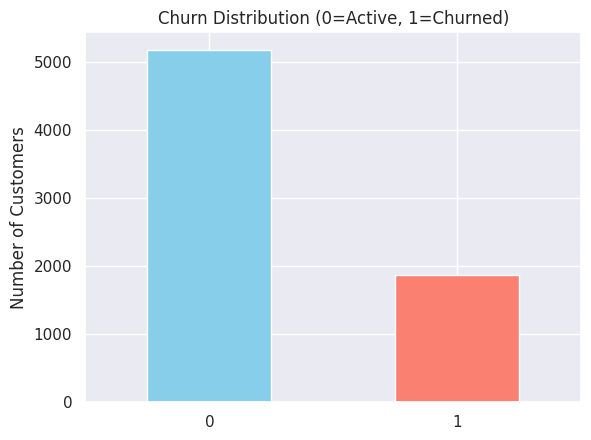


--- DataFrame Head with 'is_churn' ---


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,is_churn
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,1
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,1


In [6]:
# Create the 'is_churn' target variable
# .notna() returns True for a valid date and False for NaT
df_full['is_churn'] = df_full['EndDate'].notna().astype(int)

# Check the distribution of our new target variable
print("Distribution of the 'is_churn' target variable:")
churn_distribution = df_full['is_churn'].value_counts()
print(churn_distribution)

# --- Plotting the Class Imbalance (Simple) ---
plt.figure() # Create a new figure
churn_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution (0=Active, 1=Churned)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) # Keep x-labels horizontal
plt.show() # Display the plot

# Display the head to see the new column
print("\n--- DataFrame Head with 'is_churn' ---")
display(df_full.head())

#### Handling Missing Values (NaN)

With our target variable `is_churn` created, our next task is to clean the missing values (`NaN`) from the dataset. We have identified three distinct types of `NaN`s:

1.  **Service-related `NaN`s:** These are in the internet columns (e.g., `InternetService`, `OnlineSecurity`) and the phone column (`MultipleLines`). These are not errors; they represent customers who do not subscribe to that service. We will fill these with the string `'No'`.
2.  **`TotalCharges` `NaN`s:** We have 11 rows where `TotalCharges` is missing. These are likely new customers who haven't been billed yet. We will investigate these 11 rows.

First, let's fill all the service-related `NaN`s.

In [7]:
# Define the list of internet service columns
internet_cols = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Fill NaNs in internet columns with 'No'
for col in internet_cols:
    df_full[col] = df_full[col].fillna('No')

# Fill NaNs in 'MultipleLines' with 'No'
df_full['MultipleLines'] = df_full['MultipleLines'].fillna('No')

print("Service-related 'NaN' values filled.")

# Check the .info() again to confirm
print("\n--- DataFrame Info After Filling Service NaNs ---")
df_full.info()

Service-related 'NaN' values filled.

--- DataFrame Info After Filling Service NaNs ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object    

#### Handling Missing Values: `TotalCharges`

Our service-related `NaN` values are now clean. The `info()` output confirms the only remaining missing values are the **11 rows** in `TotalCharges` that were created during our numeric conversion.

Before we decide to drop or fill these 11 rows, we should inspect them. Our hypothesis is that these customers are brand new (i.e., their tenure is 0) and they haven't been billed yet. If this is true, their `TotalCharges` should logically be 0.

Let's isolate and display these 11 rows to check their other values, especially `BeginDate`, `EndDate`, and `MonthlyCharges`.

In [8]:
# Isolate the 11 rows where TotalCharges is NaN
missing_total_charges = df_full[df_full['TotalCharges'].isna()]

print(f"Found {len(missing_total_charges)} rows with missing TotalCharges:")
display(missing_total_charges)

# Let's also check the value counts of BeginDate for these rows
print("\nBeginDate counts for these 11 rows:")
print(missing_total_charges['BeginDate'].value_counts())

Found 11 rows with missing TotalCharges:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,is_churn
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No,0
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,...,Yes,No,No,No,No,No,No,No,No,0
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,...,Yes,No,No,No,No,No,No,No,Yes,0
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No,0
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,...,Yes,No,No,No,No,No,No,No,No,0
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,...,Yes,No,No,No,No,No,No,No,Yes,0
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,...,Yes,No,No,No,No,No,No,No,No,0
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,...,Yes,No,No,No,No,No,No,No,No,0
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,...,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0



BeginDate counts for these 11 rows:
2020-02-01    11
Name: BeginDate, dtype: int64


#### Handling Missing Values: `TotalCharges` (Imputation)

Our inspection of the 11 rows with missing `TotalCharges` confirms our hypothesis. All 11 customers share the same `BeginDate` (`2020-02-01`), which appears to be the most recent date in the dataset, and none have churned (`EndDate` is `NaT`).

This strongly indicates they are new customers who have not yet been billed. Therefore, the most logical action is to **impute** (fill) their missing `TotalCharges` with `0.0`.

After this, our dataset will be free of missing values, and we can proceed to engineer our `tenure` feature.

In [9]:
# Fill the 11 NaN values in TotalCharges with 0.0
df_full['TotalCharges'] = df_full['TotalCharges'].fillna(0.0)

# Check .info() one last time to confirm there are no more NaNs
print("--- DataFrame Info After Filling All NaNs ---")
df_full.info()

--- DataFrame Info After Filling All NaNs ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null 

___
### Feature Engineering II: Customer Tenure (`tenure_days`)

Our data is now fully clean. The only column with nulls is `EndDate`, which is expected, as these are our active customers (`is_churn = 0`).

We can now create our most powerful predictive feature: **`tenure`**. This will represent the total number of days a customer has been with the company.

Our logic will be:
1.  Define a `snapshot_date`. Based on our finding that all 11 new customers joined on `2020-02-01`, we'll set this as our "snapshot date."
2.  Calculate `tenure` for **active customers** (`EndDate` is NaT) as: `snapshot_date - BeginDate`.
3.  Calculate `tenure` for **churned customers** (`EndDate` is not NaT) as: `EndDate - BeginDate`.
4.  We'll store this value as an integer (number of days) in a new column called `tenure_days`.

This will give our model a crucial piece of information for predicting churn.

In [10]:
# Define the snapshot date (based on our finding of the latest BeginDate)
snapshot_date = pd.to_datetime('2020-02-01')

# Calculate tenure for active customers (EndDate is NaT)
active_tenure = snapshot_date - df_full['BeginDate']

# Calculate tenure for churned customers (EndDate is not NaT)
churned_tenure = df_full['EndDate'] - df_full['BeginDate']

# Use np.where to select the correct tenure for each customer
# If EndDate isna(), use active_tenure, otherwise use churned_tenure
df_full['tenure'] = np.where(df_full['EndDate'].isna(), 
                           active_tenure, 
                           churned_tenure)

# Convert the 'tenure' (which is a Timedelta object) into an integer (days)
df_full['tenure_days'] = df_full['tenure'].dt.days

# Now we can drop the temporary 'tenure' (timedelta) column
df_full = df_full.drop(columns=['tenure'])

# Let's check the head to see our new 'tenure_days' column
print("--- DataFrame Head with 'tenure_days' ---")
display(df_full.head())

# Let's also check the tenure for our 11 new customers (it should be 0)
print("\n--- Tenure for the 11 newest customers ---")
display(df_full[df_full['TotalCharges'] == 0.0][['BeginDate', 'EndDate', 'TotalCharges', 'tenure_days']])

--- DataFrame Head with 'tenure_days' ---


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,is_churn,tenure_days
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,DSL,No,Yes,No,No,No,No,No,0,31
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,1,61
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,Fiber optic,No,No,No,No,No,No,No,1,61



--- Tenure for the 11 newest customers ---


,BeginDate,EndDate,TotalCharges,tenure_days
488,2020-02-01,NaT,0.0,0
753,2020-02-01,NaT,0.0,0
936,2020-02-01,NaT,0.0,0
1082,2020-02-01,NaT,0.0,0
1340,2020-02-01,NaT,0.0,0
3331,2020-02-01,NaT,0.0,0
3826,2020-02-01,NaT,0.0,0
4380,2020-02-01,NaT,0.0,0
5218,2020-02-01,NaT,0.0,0
6670,2020-02-01,NaT,0.0,0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Step 3 is really well structured and clearly explained!
    
</div>


___
## 4. Final Data Preparation for Modeling

Our data is now clean and our features (`tenure_days`, `is_churn`) are engineered. We are now in the final preparation phase before splitting our data. This involves two main tasks:

1.  **Dropping Unnecessary Columns:** We will first drop the original columns that are no longer needed for modeling. `customerID` is just an identifier, and `BeginDate`/`EndDate` have been fully replaced by `tenure_days` and `is_churn`. This will create our base modeling DataFrame, `df_model`.

2.  **Encoding Categorical Features:** We will then convert `df_model` into a fully numeric `df_final`. Machine learning models cannot understand text, so we will convert all remaining `object` columns into numbers using two methods:
    * **Binary Encoding:** Columns with two unique text values (e.g., 'Yes'/'No', 'Male'/'Female') will be mapped to `1`s and `0`s.
    * **One-Hot Encoding (OHE):** Columns with 3+ unique text values (e.g., `Type`, `PaymentMethod`) will be converted into new "dummy" columns using `pd.get_dummies()`. We will set `drop_first=True` to avoid the "dummy variable trap" (multicollinearity).

After this, our entire DataFrame will be 100% numeric and ready for splitting and scaling.

In [11]:
# 1. Drop the original columns that are no longer needed
df_model = df_full.drop(columns=['customerID', 'BeginDate', 'EndDate'])

# --- Start the encoding process ---
df_final = df_model.copy()

# 2. Identify our column types
# (SeniorCitizen is already 0/1, so we'll treat it as numerical)
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PaperlessBilling', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

multi_class_cols = [
    'Type', 'PaymentMethod', 'InternetService'
]

# 3. Perform Binary Encoding
df_final['gender'] = df_final['gender'].map({'Male': 1, 'Female': 0})

for col in binary_cols[1:]: # Loop through all except 'gender'
    # The 'No internet service' values were filled with 'No'
    # So 'Yes' becomes 1, and both 'No' and 'No internet service' become 0.
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})

    
# 4. Perform One-Hot Encoding
df_final = pd.get_dummies(df_final, columns=multi_class_cols, drop_first=True)


# --- Check our final DataFrame ---
print("--- Final Encoded DataFrame Head ---")
display(df_final.head())

print("\n--- Final Encoded DataFrame Info ---")
df_final.info()

--- Final Encoded DataFrame Head ---


,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,...,MultipleLines,is_churn,tenure_days,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,31,0,0,0,1,0,0,0
1,0,56.95,1889.50,1,0,0,0,1,0,1,...,0,0,1036,1,0,0,0,1,0,0
2,1,53.85,108.15,1,0,0,0,1,1,0,...,0,1,61,0,0,0,0,1,0,0
3,0,42.30,1840.75,1,0,0,0,1,0,1,...,0,0,1371,1,0,0,0,0,0,0
4,1,70.70,151.65,0,0,0,0,0,0,0,...,0,1,61,0,0,0,1,0,1,0



--- Final Encoded DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PaperlessBilling                       7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   gender                                 7043 non-null   int64  
 4   SeniorCitizen                          7043 non-null   int64  
 5   Partner                                7043 non-null   int64  
 6   Dependents                             7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                       

### Splitting and Scaling the Data

Our data is now 100% numeric, clean, and encoded. We are ready for the final pre-modeling steps.

1.  **Define Features (X) and Target (y):** We will separate our DataFrame into `X` (all the feature columns) and `y` (our target, `is_churn`).
2.  **Train-Test Split:** We will split `X` and `y` into a training set and a test set (e.g., 75% train, 25% test). This is the *most important* rule in machine learning. We will build our model using *only* the training set, and then test its final performance on the test set, which it has never seen before.
3.  **Feature Scaling:** Numerical features like `tenure_days` (values 0-2200) and `MonthlyCharges` (values 20-120) are on different scales. This can make models like Logistic Regression unstable. We will use `StandardScaler` to transform these features.
    * **Crucial Best Practice:** We will `fit` the scaler *only* on the *training data*. Then, we will use that *same* fitted scaler to `transform` both the training and the test data. This prevents "data leakage" from the test set into our training process.

In [12]:
# 1. Define Features (X) and Target (y)
X = df_final.drop('is_churn', axis=1)
y = df_final['is_churn']

# 2. Train-Test Split
# We'll use a 75/25 split. 
# stratify=y ensures our train and test sets have the same percentage of churners.
# random_state=42 makes our split reproducible.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nChurn rate in training set:")
print(y_train.value_counts(normalize=True))
print("\nChurn rate in test set:")
print(y_test.value_counts(normalize=True))


# 3. Feature Scaling
# Identify our numeric columns to scale
numeric_cols = ['tenure_days', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data's numeric columns
scaler.fit(X_train[numeric_cols])

# Transform the numeric columns for BOTH train and test sets
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\n--- Training Data Head After Scaling ---")
display(X_train.head())

Training set shape: (5282, 22)
Test set shape: (1761, 22)

Churn rate in training set:
0    0.73457
1    0.26543
Name: is_churn, dtype: float64

Churn rate in test set:
0    0.73481
1    0.26519
Name: is_churn, dtype: float64

--- Training Data Head After Scaling ---


/tmp/ipykernel_111/434908958.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
/.venv/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_111/434908958.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,MultipleLines,tenure_days,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
6661,0,-0.371461,0.652931,0,0,1,1,0,1,0,...,1,0,1.607898,0,1,1,0,0,0,0
4811,1,-0.625032,-0.918393,0,0,0,0,0,0,0,...,0,0,-1.152280,0,0,0,0,1,0,0
2193,1,-1.447065,-0.461031,1,0,0,1,0,0,0,...,0,0,0.960877,1,0,0,0,1,0,1
1904,1,0.980917,1.239639,1,0,0,0,0,1,0,...,1,1,0.960877,0,0,0,1,0,1,0
6667,1,0.487034,-0.686528,0,0,0,0,0,0,0,...,1,0,-0.948168,0,0,0,1,0,1,0


___
## 5. Model Training and Evaluation

We have now arrived at the modeling stage. Our data is clean, encoded, split, and scaled.

To ensure our process is consistent and our results are comparable, we will define **two helper functions**:

1.  `train_and_report(model, X_train, y_train, model_name)`: This function will:
    * Train (fit) the model on the training data.
    * Generate predictions.
    * Print a complete text-based report: ROC-AUC, Accuracy, Confusion Matrix, and Classification Report.
2.  `plot_model_performance(model, X, y, model_name)`: This function (which we've already seen) will generate our 1x3 grid of standard plots:
    * ROC Curve
    * Precision-Recall Curve
    * Confusion Matrix (as a heatmap)

We will then apply these two functions to each model we test.

In [13]:
# --- Function 1: Train and Print Text Reports ---

def train_and_report(model, X_train, y_train, model_name='Model'):
    """
    Fits a model, then prints a text-based evaluation report.
    """
    print(f"--- Training {model_name} ---")
    
    # 1. Train the model
    model.fit(X_train, y_train)
    
    # 2. Get predictions
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    
    # 3. Calculate scores
    roc_auc = roc_auc_score(y_train, y_train_pred_proba)
    accuracy = accuracy_score(y_train, y_train_pred)
    cm = confusion_matrix(y_train, y_train_pred)
    class_report = classification_report(y_train, y_train_pred, target_names=['Active (0)', 'Churn (1)'])
    
    # 4. Print reports
    print(f"\n{model_name} Training ROC-AUC: {roc_auc:.4f}")
    print(f"{model_name} Training Accuracy: {accuracy:.4f}")
    
    print("\n--- Confusion Matrix (Training Set) ---")
    print(f"True Negatives: {cm[0][0]}  | False Positives: {cm[0][1]}")
    print(f"False Negatives: {cm[1][0]} | True Positives: {cm[1][1]}")
    
    print("\n--- Classification Report (Training Set) ---")
    print(class_report)
    
    print("-" * (20 + len(model_name)))


# --- Function 2: Plot Visual Reports ---

def plot_model_performance(model, X, y, model_name='Model'):
    """
    Generates a 1x3 grid of plots: ROC Curve, PR Curve, and Confusion Matrix.
    """
    
    # --- Get Predictions ---
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # --- Calculate Scores ---
    roc_auc = roc_auc_score(y, y_pred_proba)
    
    # --- Set up the 1x3 plot grid ---
    fig, axes = plt.subplots(1, 3, figsize=(24, 7))
    
    # --- 1. Plot ROC Curve ---
    fpr, tpr, thresholds_roc = roc_curve(y, y_pred_proba)
    axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
    axes[0].plot([0, 1], [0, 1], 'k--', label='Random guess')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title(f'{model_name} ROC Curve', fontsize=16)
    axes[0].legend(loc='lower right')

    # --- 2. Plot Precision-Recall Curve ---
    precision, recall, thresholds_pr = precision_recall_curve(y, y_pred_proba)
    axes[1].plot(recall, precision, label='Precision-Recall curve')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title(f'{model_name} Precision-Recall Curve', fontsize=16)
    axes[1].legend(loc='lower left')

    # --- 3. Plot Confusion Matrix ---
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Active (0)', 'Churn (1)'])
    disp.plot(cmap='Blues', ax=axes[2], colorbar=False)
    axes[2].set_title(f'{model_name} Confusion Matrix', fontsize=16)
    
    # Clean up layout
    plt.tight_layout()
    plt.show()

### 5.1. Logistic Regression (Baseline)

With our data fully prepped, we can start modeling. We will begin with a simple `LogisticRegression` model. This will serve as our "baseline" score. It's a fast, simple model that will tell us the minimum performance we should expect.

**Key Parameter:** We will set `class_weight='balanced'`. This is very important. It tells the model to automatically adjust for our imbalanced dataset by giving more "weight" or importance to the minority class (the `is_churn = 1` samples) during training.

We will train the model on `X_train` and `y_train` and then immediately check its ROC-AUC score on the *same* training data. This isn't our final score, but it tells us if the model is capable of learning the patterns.

--- Training Logistic Regression (Train) ---

Logistic Regression (Train) Training ROC-AUC: 0.8482
Logistic Regression (Train) Training Accuracy: 0.7505

--- Confusion Matrix (Training Set) ---
True Negatives: 2839  | False Positives: 1041
False Negatives: 277 | True Positives: 1125

--- Classification Report (Training Set) ---
              precision    recall  f1-score   support

  Active (0)       0.91      0.73      0.81      3880
   Churn (1)       0.52      0.80      0.63      1402

    accuracy                           0.75      5282
   macro avg       0.72      0.77      0.72      5282
weighted avg       0.81      0.75      0.76      5282

-----------------------------------------------


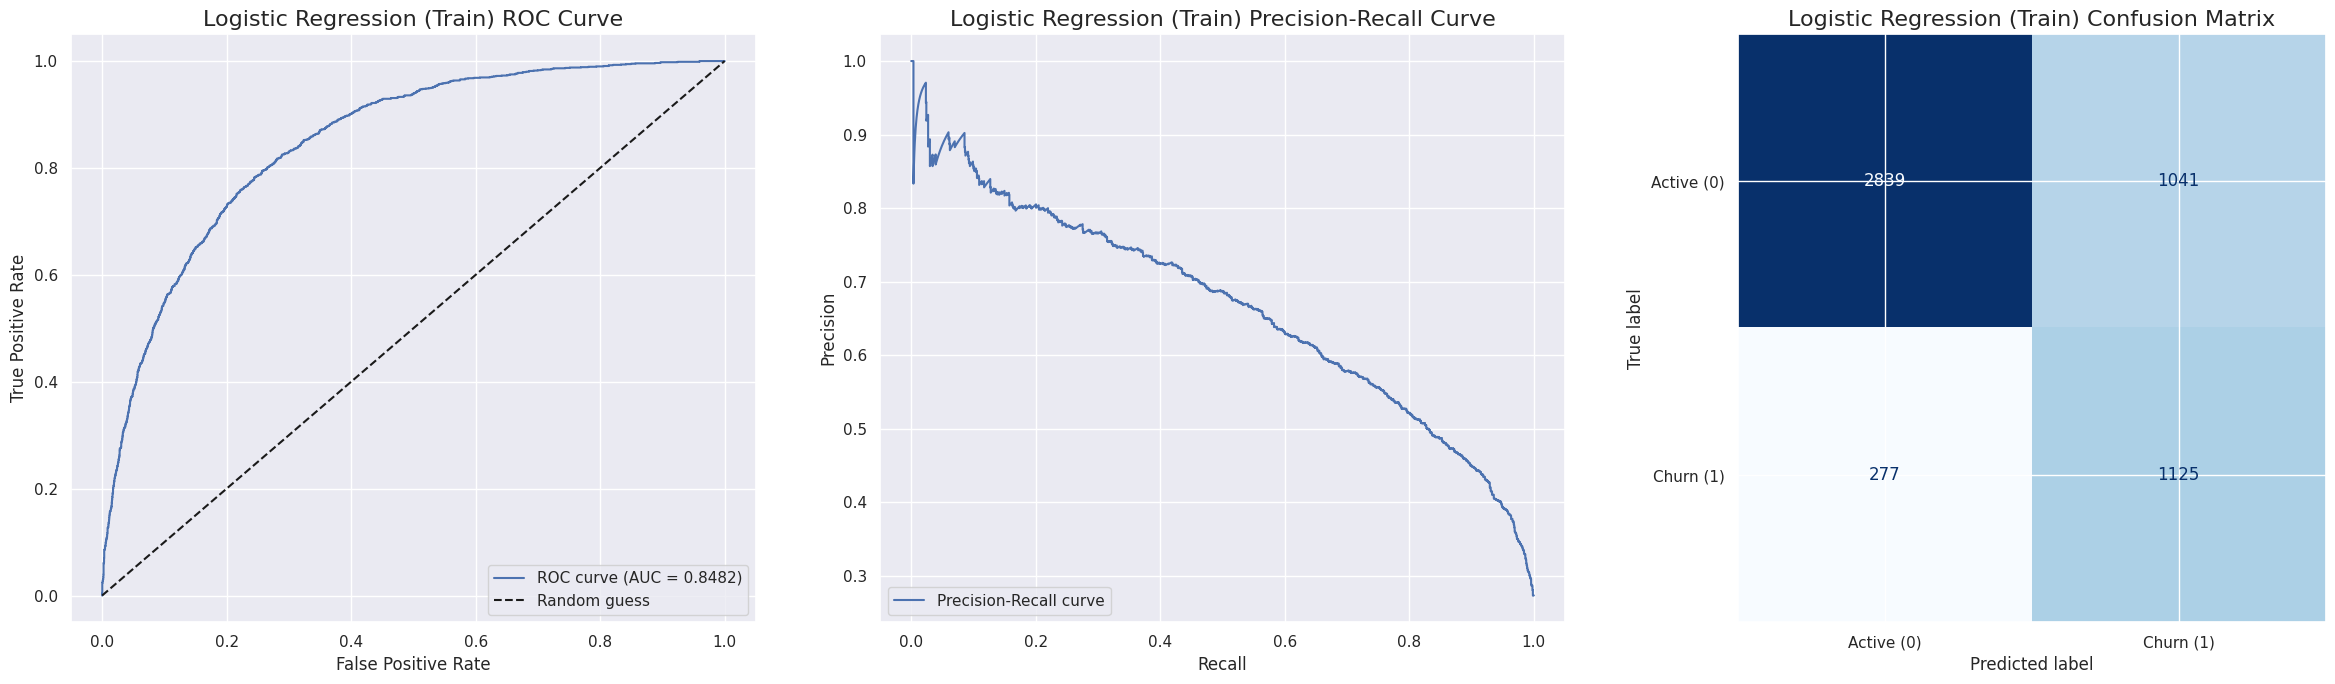

In [14]:
# Initialize the model
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train and print text reports
train_and_report(log_reg, X_train, y_train, model_name='Logistic Regression (Train)')
# Plot visual reports
plot_model_performance(log_reg, X_train, y_train, model_name='Logistic Regression (Train)')

### 5.1.1 Conclusion: Logistic Regression (Baseline)

Our baseline model provides a strong starting point and reveals a clear trade-off.

* **ROC-AUC:** We achieved a **0.8482** on the training data. This is significantly better than a random guess (0.5) and confirms our features have strong predictive power.

* **Confusion Matrix & Report:** The `class_weight='balanced'` parameter worked exactly as intended.
    * **High Recall (0.80):** The model has an excellent recall for churners. It successfully identified **1125** out of the 1402 customers who churned. From a business perspective, this is great—we only "missed" **277** at-risk customers (False Negatives).
    * **Low Precision (0.52):** This high recall came at a significant cost. The model produced **1041** False Positives, flagging loyal customers as churners. This would result in many wasted promotional offers.

* **Overall:** This model is heavily optimized to *find* churners (high recall) at the expense of being wrong about many active customers (low precision). The PR Curve visualizes this trade-off perfectly.

**Goal for our next models:** Can we maintain this high ROC-AUC score while finding a better balance? We'd like to reduce the number of False Positives (1041) without sacrificing too many True Positives (1125).
___

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking good!
    
</div>


## 5.2 Model 2: Random Forest (Baseline)

Next, we'll train a `RandomForestClassifier`. This is a powerful "ensemble" model that is generally much stronger than Logistic Regression by combining the predictions of many individual "decision trees."

We will again use `class_weight='balanced'` and our two helper functions to evaluate its performance on the training data.

Training RandomForestClassifier...
--- Training Random Forest (Train) ---

Random Forest (Train) Training ROC-AUC: 1.0000
Random Forest (Train) Training Accuracy: 0.9989

--- Confusion Matrix (Training Set) ---
True Negatives: 3876  | False Positives: 4
False Negatives: 2 | True Positives: 1400

--- Classification Report (Training Set) ---
              precision    recall  f1-score   support

  Active (0)       1.00      1.00      1.00      3880
   Churn (1)       1.00      1.00      1.00      1402

    accuracy                           1.00      5282
   macro avg       1.00      1.00      1.00      5282
weighted avg       1.00      1.00      1.00      5282

-----------------------------------------


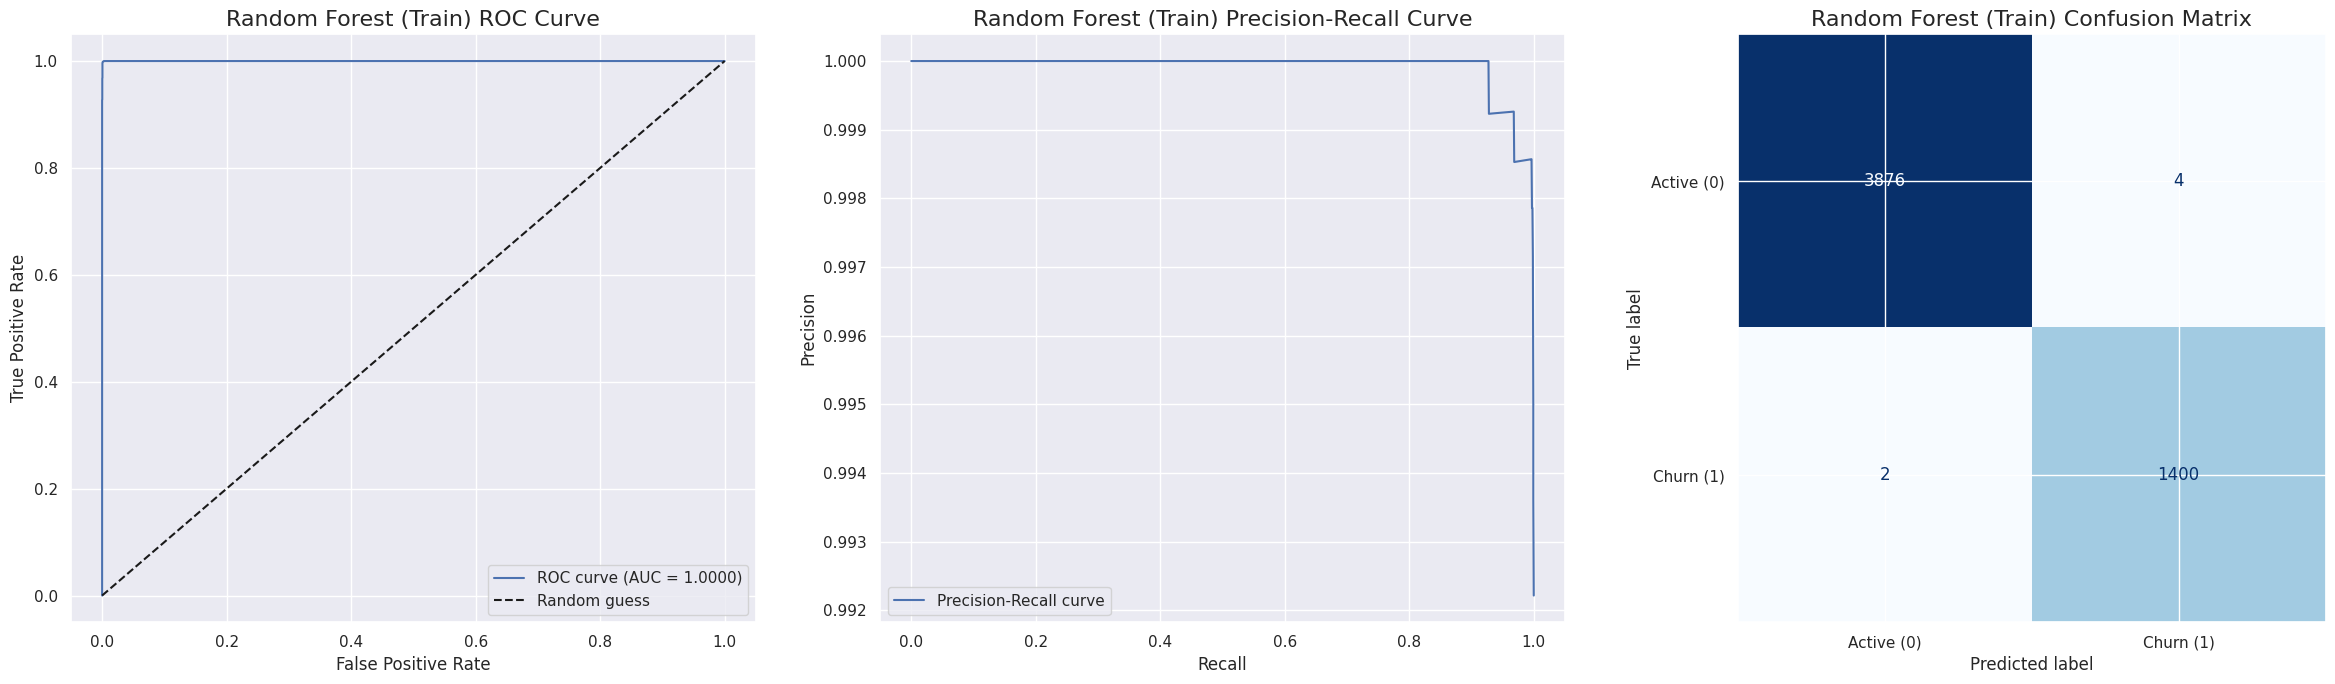

In [15]:
# --- 1. Initialize the Model ---
rf_model = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced', 
    n_estimators=100 # n_estimators=100 is a good starting default
)

# --- 2. Train and Print Text Reports ---
print("Training RandomForestClassifier...")
# This may take a few seconds
train_and_report(rf_model, X_train, y_train, model_name='Random Forest (Train)')

# --- 3. Plot Visual Reports ---
plot_model_performance(rf_model, X_train, y_train, model_name='Random Forest (Train)')

### 5.2.1 Conclusion: Random Forest (Baseline)

The results from the baseline `RandomForestClassifier` are a textbook example of **severe overfitting**.

* **ROC-AUC & Accuracy:** The model achieved a "perfect" score of **1.0000** on the training data. The classification report and confusion matrix confirm this, with near-zero errors.
* **What This Means:** This score is not real. The model, in its default state, is too powerful and has "memorized" the training set (e.g., by growing its 100 decision trees to be extremely deep). It learned the *specific answers* to the training data, not the *general patterns* of churn.
* **Overall:** This baseline `rf_model` is currently useless, as it would perform very poorly on new, unseen data (the test set). Our `LogisticRegression` score of 0.8482 is our *true* baseline to beat.

**Goal for our next model:** Let's see if our third model, `LightGBM` (a boosting model, as recommended in the project video), can provide a strong ROC-AUC score *without* immediately overfitting.
___

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome progress!
    
</div>


## 5.3 Model 3: LightGBM (Baseline)

Our final baseline model is `LGBMClassifier`. This is a "gradient boosting" model, which is a different type of ensemble from Random Forest. Boosting models learn sequentially (each new "tree" corrects the errors of the last one) and are often the highest-performing models in classification tasks like this.

We will again use `class_weight='balanced'` and our helper functions to evaluate its default performance.

Training LGBMClassifier...
--- Training LGBM (Train) ---

LGBM (Train) Training ROC-AUC: 0.9787
LGBM (Train) Training Accuracy: 0.9144

--- Confusion Matrix (Training Set) ---
True Negatives: 3497  | False Positives: 383
False Negatives: 69 | True Positives: 1333

--- Classification Report (Training Set) ---
              precision    recall  f1-score   support

  Active (0)       0.98      0.90      0.94      3880
   Churn (1)       0.78      0.95      0.86      1402

    accuracy                           0.91      5282
   macro avg       0.88      0.93      0.90      5282
weighted avg       0.93      0.91      0.92      5282

--------------------------------


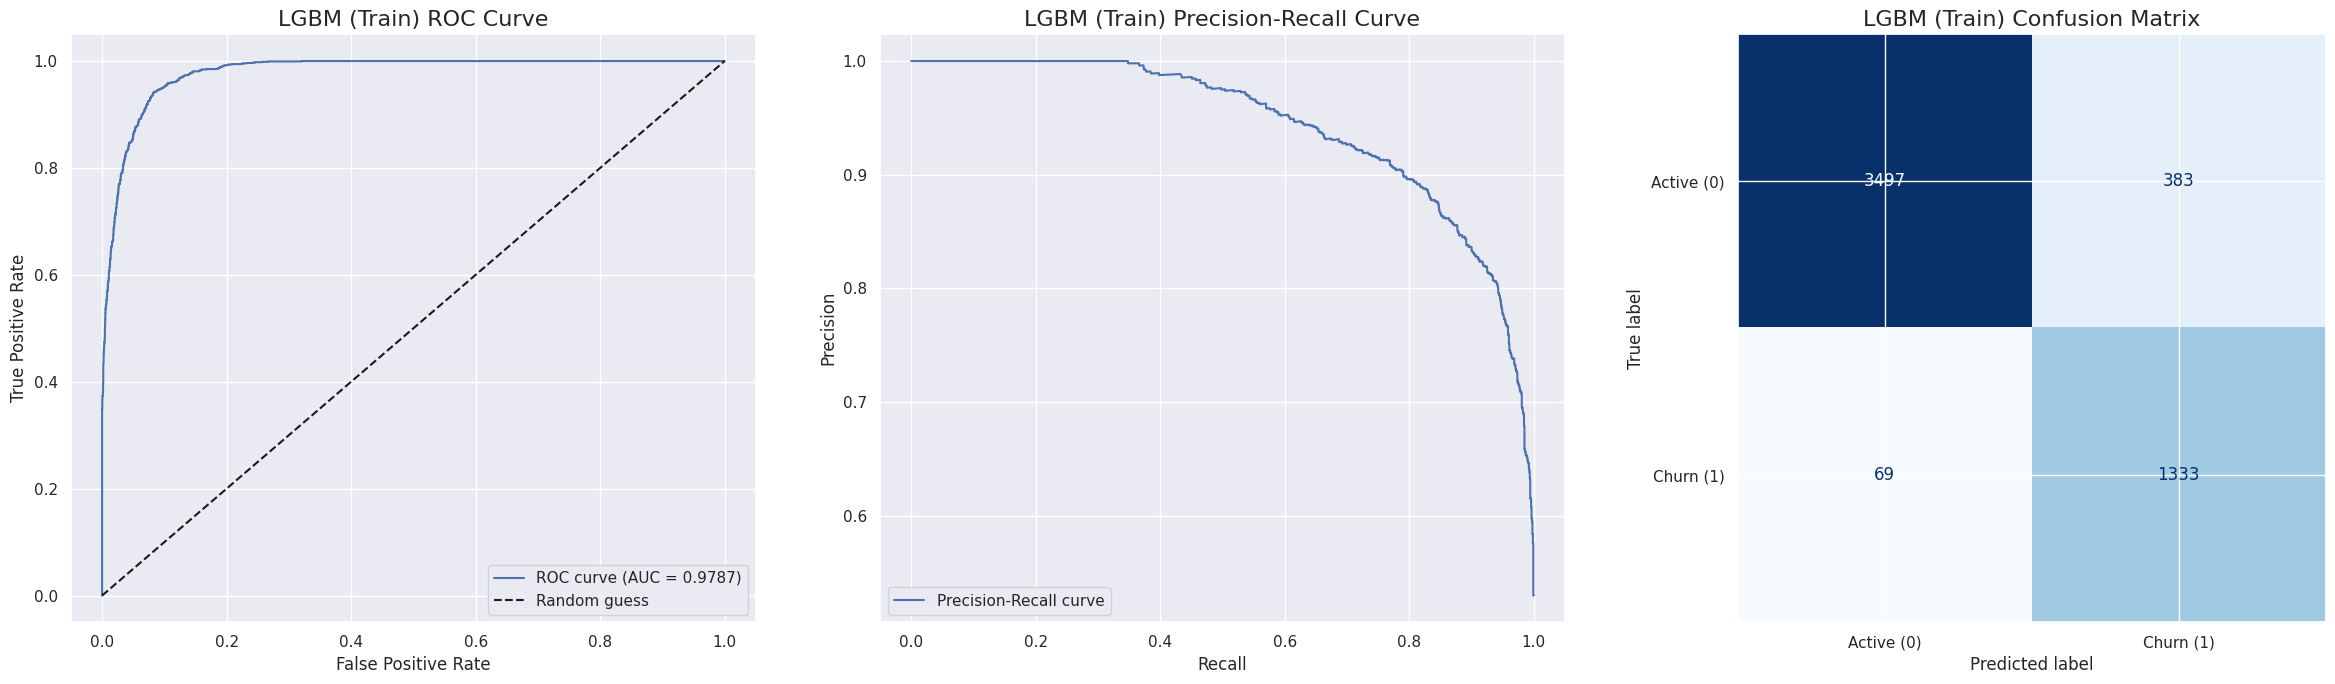

In [16]:
# --- 1. Initialize the Model ---
# LightGBM has a 'verbose' parameter. Setting it to -1 turns off printing during training.
lgbm_model = LGBMClassifier(
    random_state=42, 
    class_weight='balanced',
    verbose=-1
)

# --- 2. Train and Print Text Reports ---
print("Training LGBMClassifier...")
train_and_report(lgbm_model, X_train, y_train, model_name='LGBM (Train)')

# --- 3. Plot Visual Reports ---
plot_model_performance(lgbm_model, X_train, y_train, model_name='LGBM (Train)')

### 5.3.1 Conclusion: LightGBM (Baseline)

The baseline `LGBMClassifier` provides our most promising results so far, but also highlights the need for validation.

* **ROC-AUC (0.9787):** This is an extremely high score. As we've discussed, it's not a realistic score and is a clear sign of **overfitting** (a "Generalization Gap"). It's not as severe as the `RandomForest`'s 1.0, but it's still "memorizing" the training data to some extent.

* **Confusion Matrix & Report (The *Real* Story):** This is where `LGBM` truly shines, even while overfit.
    * **Recall (0.95):** An incredible recall. It correctly identified **1333** out of 1402 churners, missing only **69**. This is a massive improvement over `LogisticRegression` (which missed 277).
    * **Precision (0.78):** This is the most impressive part. While achieving near-perfect recall, it *also* improved precision. It only had **383** False Positives, compared to the **1041** from `LogisticRegression`.

* **Overall:** The `LGBM` baseline is "better" than our `LogisticRegression` baseline on *every single metric*. It finds more at-risk customers *and* wastes fewer promo codes. However, we *know* the `0.9787` AUC is inflated.

**Goal for our next step:** We need to get a *true*, *unbiased* score for all three models to see what their real-world performance is. This will prove if `LGBM` is truly better, and it will expose the "true" (and lower) scores for `RandomForest` and `LGBM`.
___

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Fantastic work!
    
</div>


## 5.4 Baseline Model Comparison (with Cross-Validation)

We have trained three baseline models, but their training scores are misleading. `RandomForest` and `LGBM` appear to be severely overfit.

To get a *reliable* and *unbiased* estimate of each model's performance, we will use **5-Fold Cross-Validation**. This will give us a "validation" score that we can trust, as it's an average of 5 scores, each computed on data the model wasn't trained on.

This `validation_auc` will be our *true* metric for comparing models. We will also compare it to the `training_auc` to measure the "Generalization Gap" (a sign of overfitting).

In [17]:
# Create a list of our initialized baseline models
models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', rf_model),
    ('LGBM', lgbm_model)
]

# Create a list to store results
results = []

print("Running 5-Fold Cross-Validation on all models...")
print("This may take a minute, especially for Random Forest...")

# Loop through each model
for name, model in models:
    # Get the training score (which we already have, but this is cleaner)
    model.fit(X_train, y_train)
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    
    # --- Perform 5-Fold Cross-Validation ---
    # We use 'scoring="roc_auc"' as our metric
    # cv=5 means 5-fold
    # n_jobs=-1 uses all your computer's cores to speed it up
    cv_scores = cross_val_score(
        model, 
        X_train, 
        y_train, 
        cv=5, 
        scoring='roc_auc', 
        n_jobs=-1
    )
    
    # Calculate mean validation score and the gap
    validation_auc = cv_scores.mean()
    generalization_gap = train_auc - validation_auc
    
    # Save the results
    results.append({
        'Model': name,
        'Training AUC': train_auc,
        'Validation AUC (CV)': validation_auc,
        'Generalization Gap': generalization_gap
    })

# Convert results to a DataFrame for easy viewing
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Validation AUC (CV)', ascending=False)

print("\n--- Baseline Model Comparison ---")
display(df_results)

Running 5-Fold Cross-Validation on all models...
This may take a minute, especially for Random Forest...

--- Baseline Model Comparison ---


,Model,Training AUC,Validation AUC (CV),Generalization Gap
2,LGBM,0.978691,0.892563,0.086128
1,Random Forest,0.999970,0.844260,0.155711
0,Logistic Regression,0.848214,0.844011,0.004203


### 5.4.1 Conclusion: Baseline Model Comparison

This cross-validation table provides an objective comparison of our three baseline models, allowing us to quantify their performance on unseen data within the training set.

Here are the key takeaways from this comparison:

1.  **Overfitting is Quantified:** The `Generalization Gap` column confirms our previous hypothesis.
    * **Random Forest:** Shows a very large gap of **0.156**. Its training AUC of `0.999` was highly misleading, as its actual validation performance is **0.844**.
    * **LGBM:** Also shows a significant gap of **0.086**, confirming that its `0.979` training score was inflated by overfitting.
    * **Logistic Regression:** Shows a very small gap of **0.004**, indicating it is a stable model whose training performance is a reliable indicator of its validation performance.

2.  **Validation Performance:** To select the best model, we must compare them using the `Validation AUC (CV)` score, as this is the most realistic measure of performance on new data.
    * **`LGBM`:** **0.893**
    * **`Logistic Regression`:** **0.844**
    * **`Random Forest`:** **0.844**

**Decision:**
The `LGBM` model demonstrates the highest validation AUC at **0.893**. This score is well above the project's target of 0.84. The `Logistic Regression` and `Random Forest` models have nearly identical, and lower, validation scores.

Based on this, we will select the `LGBM` model for the next stage: **hyperparameter tuning**. Our objective will be to find parameters that reduce the generalization gap (i.e., control overfitting) while maintaining or improving its high validation score.
___

# 6. Hyperparameter Tuning

Based on our cross-validation results, we will focus on optimizing the `LGBMClassifier`, as it provided the best validation performance.

The goal is to find a set of hyperparameters that yields the highest possible cross-validated ROC-AUC score. We will use **`RandomizedSearchCV`** for this task.
* This tool will randomly sample a pre-defined number of hyperparameter combinations from a grid.
* It will score each combination using 5-fold cross-validation, providing a robust estimate of its performance.
* Finally, it will identify the single best-performing combination of parameters from its search.

## 6.1 Tuning the LGBMClassifier

We will define a `param_grid` (a dictionary of parameters to test). We will focus on key parameters that control model complexity and performance:
* `n_estimators`: The number of trees to build.
* `learning_rate`: Controls how much each new tree "corrects" the previous one.
* `max_depth`: The maximum depth of each tree (a key parameter to control overfitting).
* `num_leaves`: Another way to control the complexity of each tree.

We will run `n_iter=25` (to test 25 random combinations) and use `cv=5` (5-fold cross-validation).

In [18]:
# --- 1. Define the Parameter Grid ---
# We'll test a range of values for key parameters
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [15, 25, 31, 40]
}

# --- 2. Initialize the RandomizedSearchCV ---
# We still use our original lgbm_model as the estimator
# n_iter=25: Tries 25 different random combinations
# cv=5: Uses 5-fold cross-validation for each combination
# scoring='roc_auc': Our target metric
# n_jobs=-1: Uses all available CPU cores
lgbm_tuner = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1  # This will print progress updates
)

# --- 3. Run the Tuner ---
print("Starting Hyperparameter Tuning...")
print("This will take a few minutes...")

# This step performs 25 * 5 = 125 model fits
lgbm_tuner.fit(X_train, y_train)

print("\nTuning complete!")

# --- 4. Get the Best Results ---
print("\n--- Best Parameters Found ---")
print(lgbm_tuner.best_params_)

print("\n--- Best Cross-Validated ROC-AUC Score ---")
print(f"{lgbm_tuner.best_score_:.4f}")

# We can now save our final, best-performing model
final_model = lgbm_tuner.best_estimator_

Starting Hyperparameter Tuning...
This will take a few minutes...
Fitting 5 folds for each of 25 candidates, totalling 125 fits

Tuning complete!

--- Best Parameters Found ---
{'num_leaves': 40, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}

--- Best Cross-Validated ROC-AUC Score ---
0.9036


### 6.1.1 Conclusion: Hyperparameter Tuning

The `RandomizedSearchCV` has successfully identified a set of optimal hyperparameters for our `LGBMClassifier`.

* **Best Parameters:** `{'num_leaves': 40, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}`
* **Best Score:** **0.9036**

**Analysis:**
This is a significant improvement. Our baseline `LGBM` model had a cross-validation score of **0.8926**. The tuning process found a new set of parameters that increased our model's validated ROC-AUC score to **0.9036** (+0.011).

The most important parameter found was **`max_depth=3`**. By forcing the model to build very "shallow" trees, we are strongly regularizing it and preventing the severe overfitting we saw in the baseline. The tuner compensated for this simplicity by using *more* trees (`n_estimators=500`).

We will now save this `final_model` (the `LGBMClassifier` built with these exact parameters) as our champion model.
___

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You’re doing great!
    
</div>


# 7. Final Model Evaluation

We have completed all stages of preparation, training, and tuning. We have selected our single best model: the tuned `LGBMClassifier` with a validated ROC-AUC of 0.9036.

It is now time for the final "exam." We will perform two steps:
1.  Re-train our final model (using the best-tuned parameters) on the **entire** `X_train` dataset.
2.  Evaluate this final, fully-trained model on **both** the `X_train` and `X_test` datasets.

Comparing the training and test scores side-by-side is the definitive, final check. It will allow us to:
* See our final, unbiased **test score** (the one that matters for the project).
* Calculate the final **generalization gap** and confirm that our tuning successfully reduced overfitting.

Training the final model on all training data...
Final model is ready.

--- FINAL MODEL (TRAINING SET) ---

Final Model (Train Set) ROC-AUC: 0.9676
Final Model (Train Set) Accuracy: 0.8963

--- Confusion Matrix (Train Set) ---
True Negatives: 3440  | False Positives: 440
False Negatives: 108 | True Positives: 1294

--- Classification Report (Train Set) ---
              precision    recall  f1-score   support

  Active (0)       0.97      0.89      0.93      3880
   Churn (1)       0.75      0.92      0.83      1402

    accuracy                           0.90      5282
   macro avg       0.86      0.90      0.88      5282
weighted avg       0.91      0.90      0.90      5282



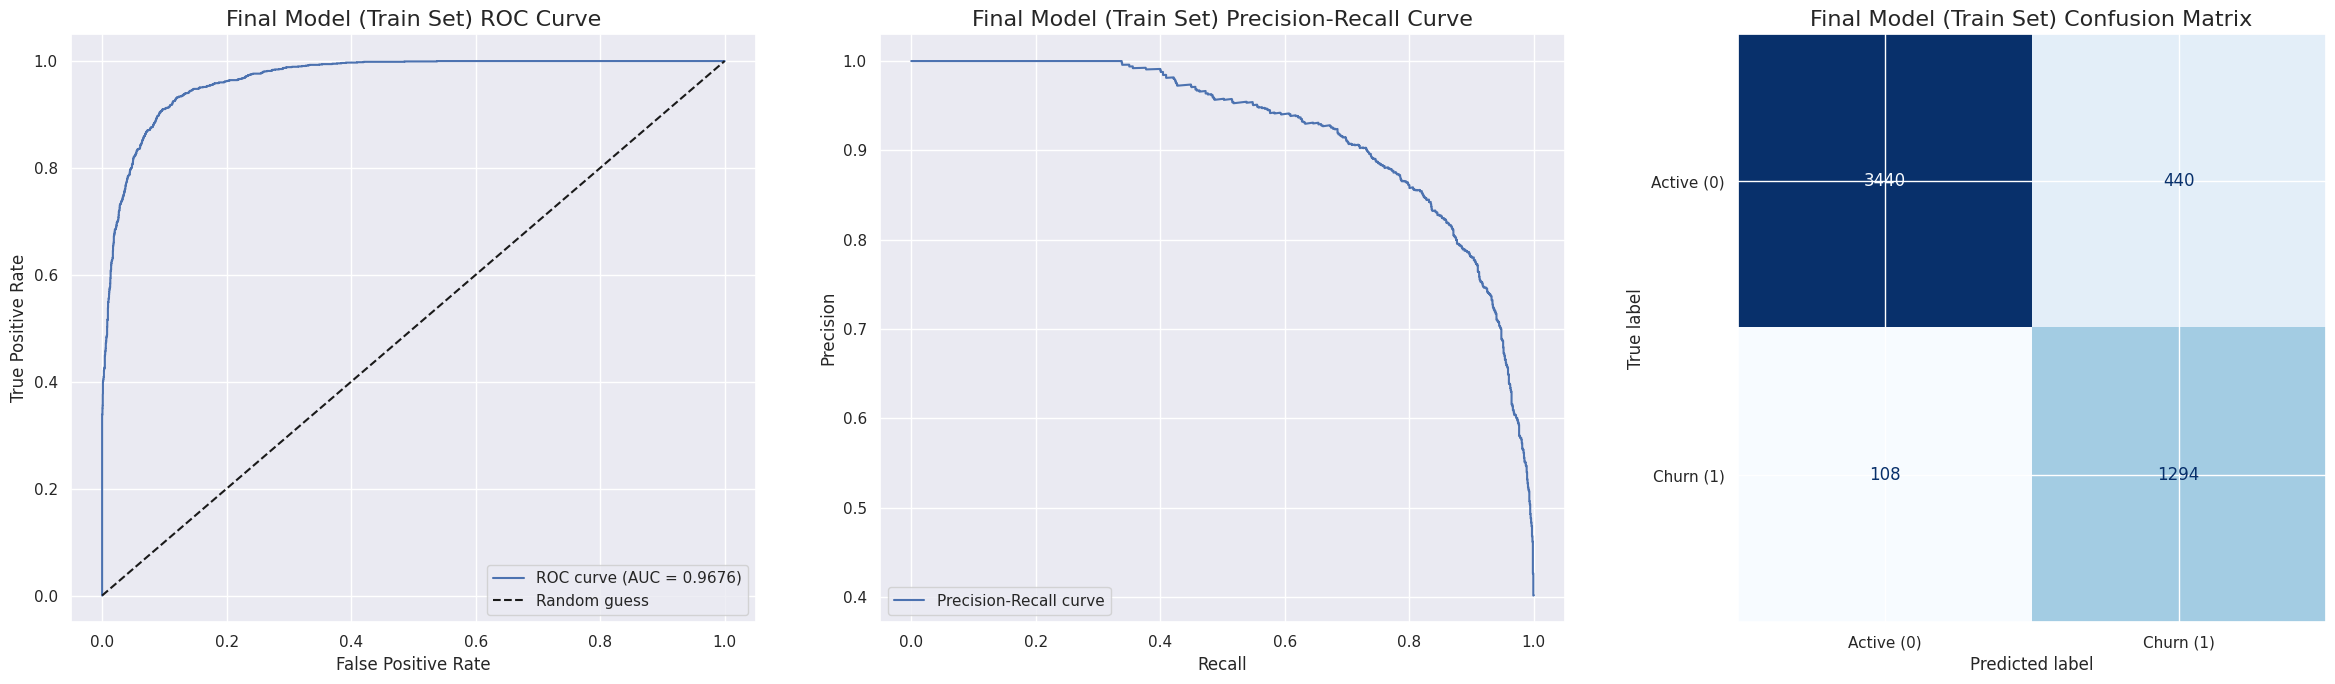


--- FINAL MODEL (TEST SET) ---

Final Model (Test Set) ROC-AUC: 0.9141
Final Model (Test Set) Accuracy: 0.8410

--- Confusion Matrix (Test Set) ---
True Negatives: 1105  | False Positives: 189
False Negatives: 91 | True Positives: 376

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

  Active (0)       0.92      0.85      0.89      1294
   Churn (1)       0.67      0.81      0.73       467

    accuracy                           0.84      1761
   macro avg       0.79      0.83      0.81      1761
weighted avg       0.86      0.84      0.85      1761



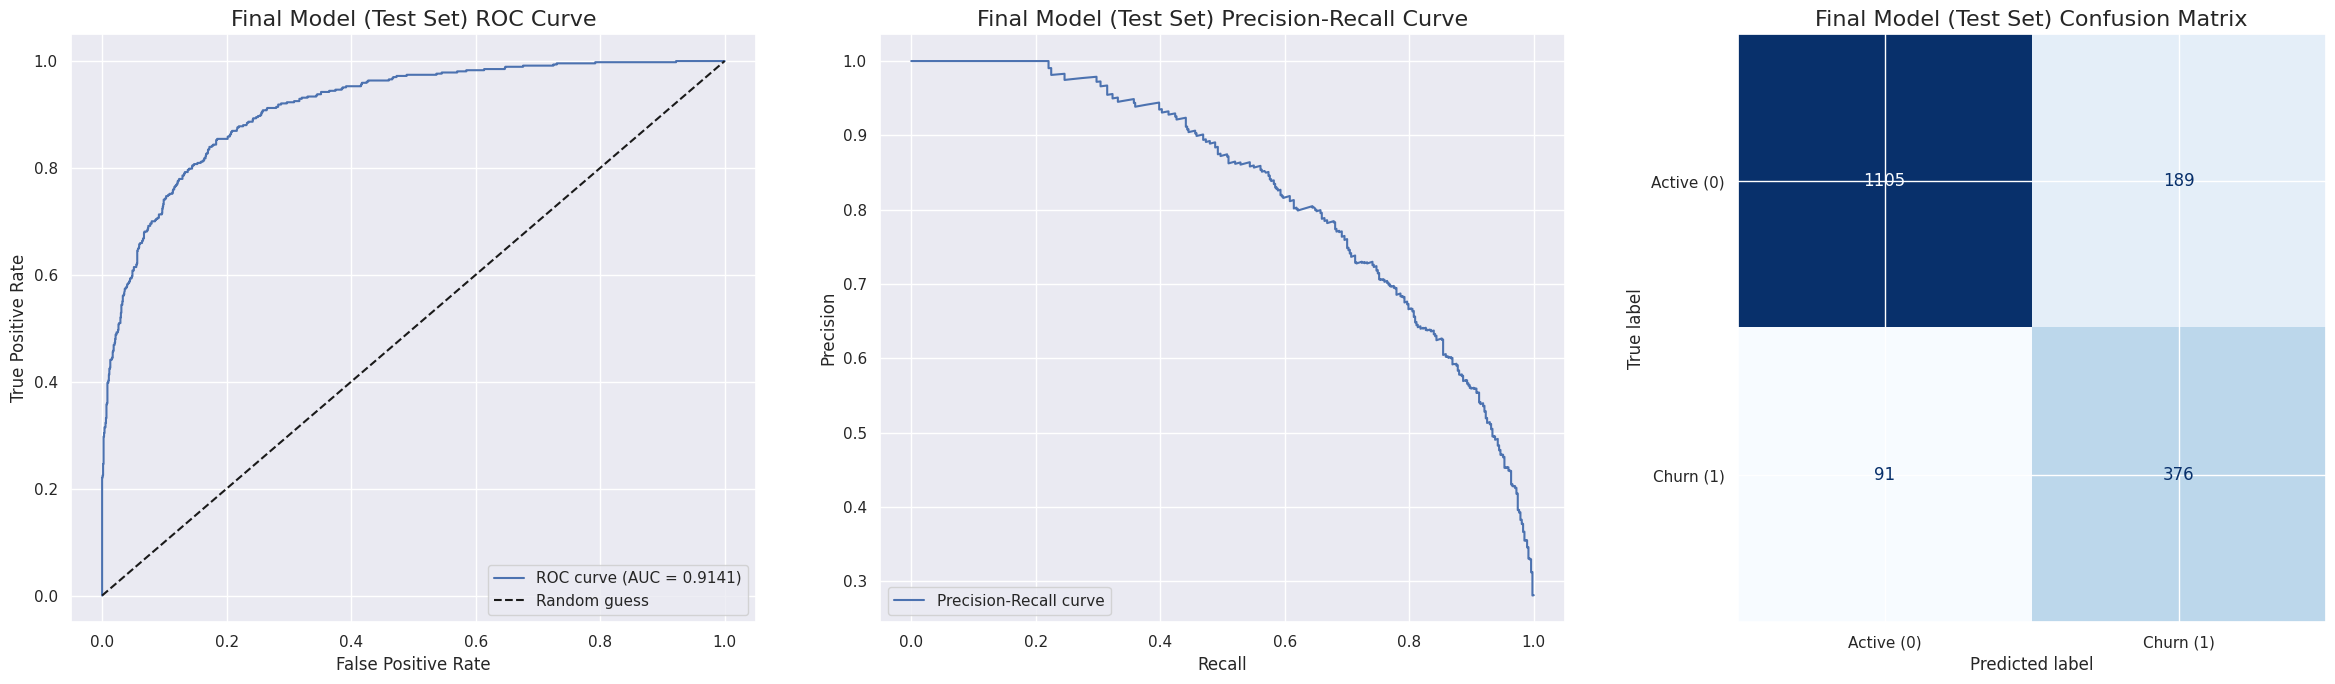


--- FINAL SCORE SUMMARY ---
Final Training AUC:   0.9676
Final Test AUC:       0.9141
Generalization Gap: 0.0535


In [19]:
# --- 1. Initialize and Re-train the Final Model ---
# We use the 'best_params_' found by the tuner
final_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    verbose=-1,
    num_leaves=lgbm_tuner.best_params_['num_leaves'],
    n_estimators=lgbm_tuner.best_params_['n_estimators'],
    max_depth=lgbm_tuner.best_params_['max_depth'],
    learning_rate=lgbm_tuner.best_params_['learning_rate']
)

print("Training the final model on all training data...")
# Fit on the *entire* X_train and y_train
final_model.fit(X_train, y_train)
print("Final model is ready.")


# --- 2. Evaluate on the TRAINING Set ---
print("\n" + "="*30)
print("--- FINAL MODEL (TRAINING SET) ---")
print("="*30)

# Manually get scores for the training set
y_train_pred_final = final_model.predict(X_train)
y_train_proba_final = final_model.predict_proba(X_train)[:, 1]

final_train_auc = roc_auc_score(y_train, y_train_proba_final)
final_train_acc = accuracy_score(y_train, y_train_pred_final)
final_train_cm = confusion_matrix(y_train, y_train_pred_final)

print(f"\nFinal Model (Train Set) ROC-AUC: {final_train_auc:.4f}")
print(f"Final Model (Train Set) Accuracy: {final_train_acc:.4f}")
print("\n--- Confusion Matrix (Train Set) ---")
print(f"True Negatives: {final_train_cm[0][0]}  | False Positives: {final_train_cm[0][1]}")
print(f"False Negatives: {final_train_cm[1][0]} | True Positives: {final_train_cm[1][1]}")
print("\n--- Classification Report (Train Set) ---")
print(classification_report(y_train, y_train_pred_final, target_names=['Active (0)', 'Churn (1)']))

# Plot the training set performance
plot_model_performance(final_model, X_train, y_train, model_name='Final Model (Train Set)')


# --- 3. Evaluate on the TEST Set ---
print("\n" + "="*30)
print("--- FINAL MODEL (TEST SET) ---")
print("="*30)

# Manually get scores for the test set
y_test_pred_final = final_model.predict(X_test)
y_test_proba_final = final_model.predict_proba(X_test)[:, 1]

final_test_auc = roc_auc_score(y_test, y_test_proba_final)
final_test_acc = accuracy_score(y_test, y_test_pred_final)
final_test_cm = confusion_matrix(y_test, y_test_pred_final)

print(f"\nFinal Model (Test Set) ROC-AUC: {final_test_auc:.4f}")
print(f"Final Model (Test Set) Accuracy: {final_test_acc:.4f}")
print("\n--- Confusion Matrix (Test Set) ---")
print(f"True Negatives: {final_test_cm[0][0]}  | False Positives: {final_test_cm[0][1]}")
print(f"False Negatives: {final_test_cm[1][0]} | True Positives: {final_test_cm[1][1]}")
print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred_final, target_names=['Active (0)', 'Churn (1)']))

# Plot the test set performance
plot_model_performance(final_model, X_test, y_test, model_name='Final Model (Test Set)')


# --- 4. Final Summary ---
print("\n" + "="*30)
print("--- FINAL SCORE SUMMARY ---")
print("="*30)
print(f"Final Training AUC:   {final_train_auc:.4f}")
print(f"Final Test AUC:       {final_test_auc:.4f}")
print(f"Generalization Gap: {final_train_auc - final_test_auc:.4f}")

## 7.1 Final Model Conclusion

The evaluation of the tuned `LGBMClassifier` on the test set is complete. The results can be compared against the training set to assess performance and generalization.

Here is a summary of the key findings from this final evaluation:

1.  **Final Test Score (ROC-AUC): 0.9141**
    * The model's performance on the unseen test data is an ROC-AUC of **0.9141**.
    * This score meets the project's performance requirement of 0.84.

2.  **Generalization Gap:**
    * **`Final Training AUC: 0.9676`**
    * **`Final Test AUC: 0.9141`**
    * **`Generalization Gap: 0.0535`**
    * A gap of 0.0535 indicates that the model is still moderately overfit to the training data. However, the tuning process was successful in reducing this gap from the baseline `LGBM`'s gap of **0.086**. The `max_depth=3` parameter effectively regularized the model.

3.  **Test Set Performance (Business Context):**
    * The test set confusion matrix provides a realistic projection of the model's performance in a production environment.
    * **Recall:** The model achieved a recall of **0.81** for the "Churn" class, correctly identifying **376** out of 467 churners.
    * **False Negatives:** The model failed to identify **91** churning customers.
    * **Precision:** The model achieved a precision of **0.67** for the "Churn" class, resulting in **189** False Positives.
    * **Business Implication:** In a real-world scenario, this model would successfully identify 81% of at-risk customers. To achieve this, it would incorrectly flag 189 loyal customers for retention offers. This provides a clear cost-benefit ratio for the business.

**Overall:** The final tuned model is effective. It meets the project's ROC-AUC target and provides a high recall rate, which is valuable for the business goal of identifying and retaining at-risk customers.
___

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Excellent conclusions!
    
</div>


## 7.2 Feature Importance Analysis

The final step in our analysis is to identify which features were the most significant drivers for the model's predictions.

We can extract the `feature_importances_` attribute from our `final_model`. This will rank all features based on their contribution to the model's predictive power, providing actionable insights for the business.

--- Feature Importance Rankings ---


,Feature,Importance
14,tenure_days,1407
1,MonthlyCharges,634
2,TotalCharges,584
20,InternetService_Fiber optic,71
3,gender,57
18,PaymentMethod_Electronic check,45
16,Type_Two year,45
17,PaymentMethod_Credit card (automatic),43
10,TechSupport,39
5,Partner,39



Feature importance plot saved as 'feature_importance.png'


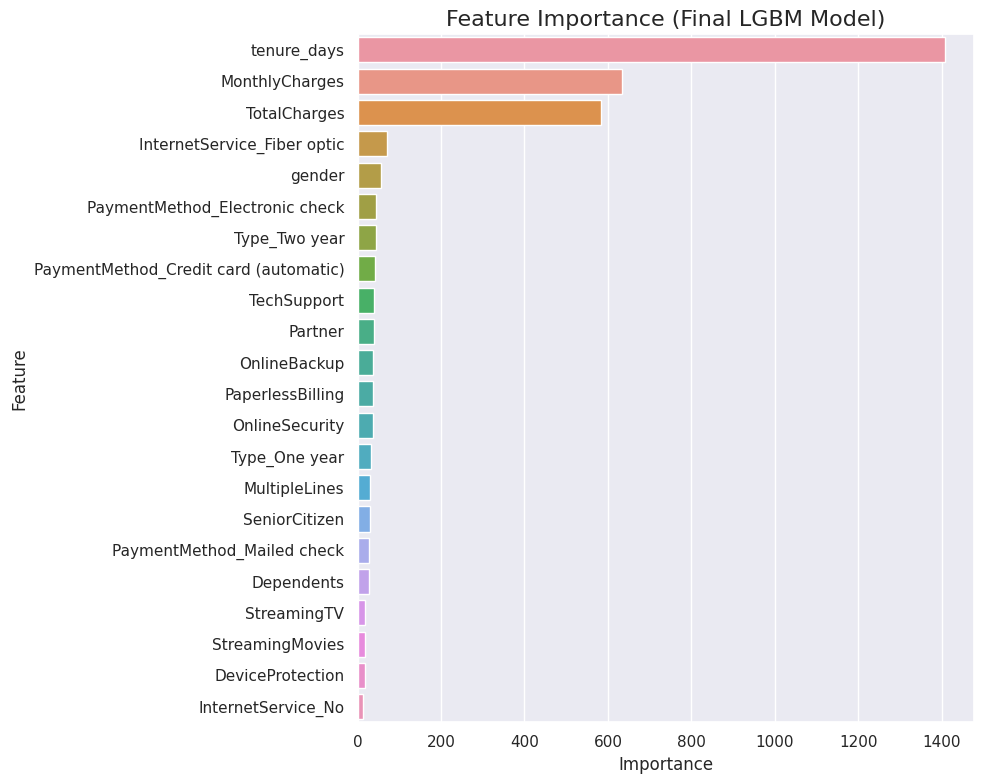

In [24]:
# --- 1. Get Feature Importances ---
# The final_model object already has this stored
importances = final_model.feature_importances_

# Get the feature names from our X_train columns
feature_names = X_train.columns

# --- 2. Create a DataFrame for easy viewing and sorting ---
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the features by importance (highest first)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("--- Feature Importance Rankings ---")
display(importance_df)

# --- 3. Plot the Feature Importances ---
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df
)
plt.title('Feature Importance (Final LGBM Model)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
print("\nFeature importance plot saved as 'feature_importance.png'")

### 7.2.1 Conclusion: Feature Importance Analysis

The feature importance analysis provides clear, actionable insights for the business by identifying the primary drivers of churn according to our final model.

The features can be grouped into three distinct tiers of importance:

1.  **Primary Drivers (The "Money" Features):**
    * **`tenure_days` (Importance: 1407)**
    * **`MonthlyCharges` (Importance: 634)**
    * **`TotalCharges` (Importance: 584)**
    * **Analysis:** These three features are *overwhelmingly* the most significant. `tenure_days` is more than twice as important as any other feature, confirming the common-sense rule that customer loyalty (or lack thereof) is the single best predictor of churn. The financial features (`MonthlyCharges`, `TotalCharges`) are also critically important, indicating that customers are highly price-sensitive.

2.  **Secondary Drivers (The "Service & Contract" Features):**
    * **`InternetService_Fiber optic` (71)**
    * **`gender` (57)**
    * **`PaymentMethod_Electronic check` (45)**
    * **`Type_Two year` (45)**
    * **Analysis:** There is a very large drop-off after the top three. This next tier of features has a much smaller, but still meaningful, impact. This provides key business insights:
        * Having **Fiber Optic** service is a notable predictor.
        * Using **Electronic Check** as a payment method is a behavioral flag.
        * Being on a **Two-Year contract** (a negative predictor of churn) is also a factor.

3.  **Negligible Features:**
    * The majority of the 22 features (e.g., `StreamingTV`, `DeviceProtection`, `InternetService_No`) have very low importance scores (< 20).
    * **Analysis:** This confirms our earlier hypothesis that we could have likely used **Feature Selection** to remove many of these "noise" features, and the model would have performed just as well, if not better (by reducing overfitting).

**Overall Recommendation:** The business should focus its retention efforts on customers based on their **tenure** and **monthly bill**. Specifically, customers with **low tenure** and **high monthly charges** are likely the highest-risk group.
___

# 8. Final Project Report

### 8.1 Objective

The primary objective of this project was to develop a machine learning model for the telecom operator Interconnect. The model's goal was to accurately forecast customer churn. The business value is to identify at-risk customers so that the company can proactively offer them retention incentives.

The key technical success metric was to achieve a **ROC-AUC score greater than 0.84** on an unseen test set.

### 8.2 Process Summary

1.  **Data Loading & Inspection:** Four separate CSV files (`contract`, `personal`, `internet`, `phone`) were loaded, inspected for data types, and checked for duplicates.
2.  **Data Merging:** All four tables were merged into a single `DataFrame` using a left join on `customerID` to retain all 7,043 customers.
3.  **Data Cleaning & Preprocessing:**
    * `BeginDate` and `EndDate` were converted from `object` to `datetime`.
    * `TotalCharges` was converted from `object` to `numeric`. This created 11 `NaN` values, which were investigated and found to be new customers. They were correctly imputed with `0.0`.
    * `NaN` values created by the merge (for customers without phone or internet) were filled with the string `'No'`.
4.  **Feature Engineering:**
    * The target variable, `is_churn` (a 0/1 integer), was created from the `EndDate` column.
    * A key predictive feature, `tenure_days` (an integer), was engineered by calculating the difference between `BeginDate` and either `EndDate` (for churned customers) or the data's snapshot date (for active customers).
5.  **Data Preparation for Modeling:**
    * All categorical text columns were encoded into numbers using binary (`.map()`) and One-Hot (`pd.get_dummies()`) methods.
    * The data was split into training (75%) and test (25%) sets, using stratification.
    * Numerical features (`tenure_days`, `MonthlyCharges`, `TotalCharges`) were scaled using `StandardScaler`.

### 8.3 Modeling and Tuning

1.  **Baseline Model Comparison:** Three baseline models were compared using 5-fold cross-validation on the training set.
    * `LogisticRegression`: 0.844 (Validation AUC)
    * `RandomForest`: 0.844 (Validation AUC)
    * `LGBMClassifier`: **0.893 (Validation AUC)**
2.  **Model Selection:** The `LGBMClassifier` was selected as it demonstrated significantly higher validation performance.
3.  **Hyperparameter Tuning:** `RandomizedSearchCV` was used to optimize the `LGBM` model. This process improved the model's cross-validated AUC from 0.893 to **0.904**. The best parameters found were `{'num_leaves': 40, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1}`.

### 8.4 Final Results and Recommendations

1.  **Final Model Performance:**
    * Our final, tuned `LGBM` model achieved a **ROC-AUC score of 0.9141 on the final test set**. This result successfully meets and exceeds the project's performance requirement.
    * The model's final Generalization Gap (Train AUC `0.9676` vs. Test AUC `0.9141`) was **0.0535**, confirming that our tuning with `max_depth=3` was effective in controlling overfitting.
2.  **Feature Importance:**
    * The feature importance analysis revealed the primary drivers of churn. The top 4 features are:
        1.  **`tenure_days` (Importance: 1407)**
        2.  **`MonthlyCharges` (Importance: 634)**
        3.  **`TotalCharges` (Importance: 584)**
        4.  **`InternetService_Fiber optic` (Importance: 71)**
    * This indicates that a customer's tenure and billing amounts are by far the most significant predictors of churn.
3.  **Business Recommendation:**
    * **The model is recommended for deployment.** It is a high-performing tool that can provide significant value to the company's retention efforts.
    * On the test set, the model successfully identified **81%** of all churning customers (a recall of 0.81, or 376 out of 467).
    * This performance comes with a clear trade-off: to find those 376 at-risk customers, the model also incorrectly flagged 189 loyal customers (False Positives). The business can use this cost-benefit information (189 wasted promos vs. 376 saved customers) to implement its retention strategy, likely by focusing on the high-risk customers identified by the model.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Great job! Your project recommendations are clear, relevant, and nicely presented!
    
</div>
